<a href="https://colab.research.google.com/github/dev02chandan/computer_vision/blob/main/Gaussian%20Mixture%20Models%20for%20Background%20seperation%20in%20videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GMM**

**`Task 1`**: Download given video

**`Task 2`**: Apply GMM with two Gaussians to determine background

**`Task 3`**: Separate foreground for different frames of video

**`Task 4`**: Change number of Gaussians

**`Task 5`**: Observe effects

## **GMM with two Gaussians to determine background**

Any pixel that is moving (changing) - is not background
All other pixels that are constant throughout the video - background

Gaussian Mixture Model - generally used for clustering but we will use it for background detection

Then we will approximate the pixels with a gaussian curve.
If we are not able to approximate it, we can add more gaussian models

We will try to see the background, and then when we impose it on any image, we can see the location of the car. This is how object tracking is done.



In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage.color import rgb2gray
from google.colab.patches import cv2_imshow

In [2]:
traffic = cv2.VideoCapture('traffic.avi')

In [3]:
traffic

< cv2.VideoCapture 0x7bc568a414f0>

In [4]:
if not traffic.isOpened():
    print('Error opening video file')
    exit()

In [8]:
# Reading the first frame
ret, frame = traffic.read()

In [14]:
ret
# Ret conveys that if the frame is present or not
# if we have reached the last frame, it becomes false

True

In [9]:
if not ret:
    print('Error reading video frame')
    exit()

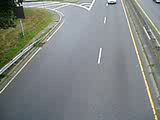

In [16]:
cv2_imshow(frame)

In [17]:
frame.shape

(120, 160, 3)

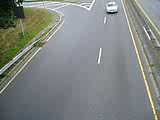

In [48]:
# the second time, we read traffic, we get the next frame
ret2, frame2 = traffic.read()
cv2_imshow(frame2)

In [19]:
# We want to capture all the frames, and don't want to read one at a time.
# We also want to have a count.

In [23]:
v = cv2.VideoCapture('traffic.avi')

f = [] # will hold all the frames of the video
k = 0 # number of frames

while True:
    r, frame = v.read()
    if r:
        k += 1
        f.append(frame)
    else:
        break

frames = np.array(f)

In [25]:
frames.shape

(120, 120, 160, 3)

In [26]:
k

120

In [27]:
# Now we will take each frame and put it in the model

In [28]:
gmm = GaussianMixture(n_components=2)

In [34]:
shape = frames.shape
print(shape[1:])

(120, 160, 3)


In [32]:
background = np.zeros(shape[1:])

In [ ]:
# Iterating over 120 rows
    # Iterating over 160 columns
        # Iterating over 3 channels
            # same_pixel_in_all_frames will now hold (120,) pixels for the same pixel throughout all the frames

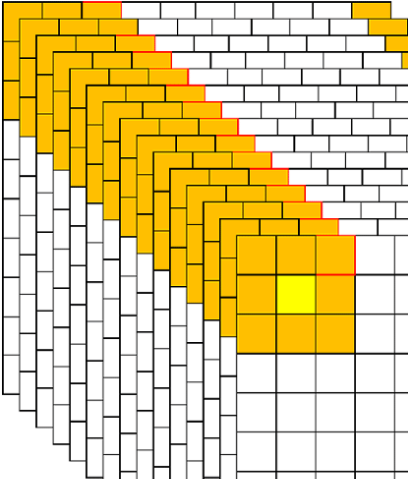

One pixel throughout all the frames

In [54]:
for row in range(shape[1]):

    for col in range(shape[2]):

        for channel in range(shape[3]):

            same_pixel_in_all_frames = frames[: , row, col, channel]

            same_pixel_in_all_frames = same_pixel_in_all_frames.reshape(same_pixel_in_all_frames.shape[0], 1)

            gmm.fit(same_pixel_in_all_frames)

            means = gmm.means_
            weights = gmm.weights_

            index = np.argmax(weights)

            background[row][col][channel] = int(means[index])


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)


In [55]:
cv2.imwrite('background.png', background)

True

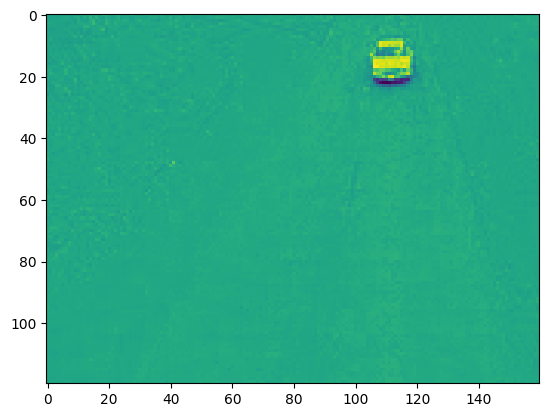

In [70]:
# Let's see it with the 10th image
image = frames[10, : , : , :]

foreground = image - background

f_gray = rgb2gray(foreground)

plt.imshow(f_gray)

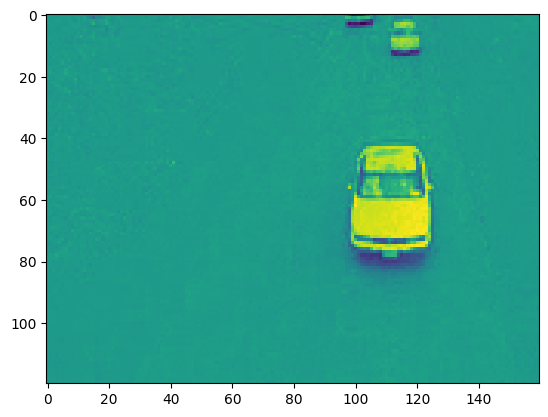

In [62]:
# Let's see it with the 10th image
image = frames[20, : , : , :]

foreground = image - background

f_gray = rgb2gray(foreground)

plt.imshow(f_gray)

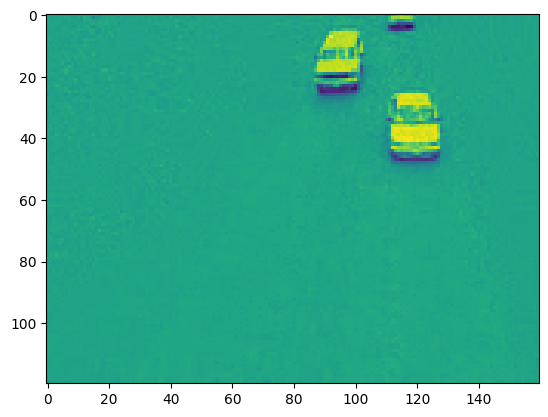

In [63]:
# Let's see it with the 10th image
image = frames[30, : , : , :]

foreground = image - background

f_gray = rgb2gray(foreground)

plt.imshow(f_gray)

## **Experimentation**

In [64]:
gmm_3 = GaussianMixture(n_components=3)

In [65]:
background_3 = np.zeros(shape[1:])

In [66]:
for row in range(shape[1]):

    for col in range(shape[2]):

        for channel in range(shape[3]):

            same_pixel_in_all_frames = frames[: , row, col, channel]

            same_pixel_in_all_frames = same_pixel_in_all_frames.reshape(same_pixel_in_all_frames.shape[0], 1)

            gmm_3.fit(same_pixel_in_all_frames)

            means = gmm_3.means_
            weights = gmm_3.weights_

            index = np.argmax(weights)

            background_3[row][col][channel] = int(means[index])


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


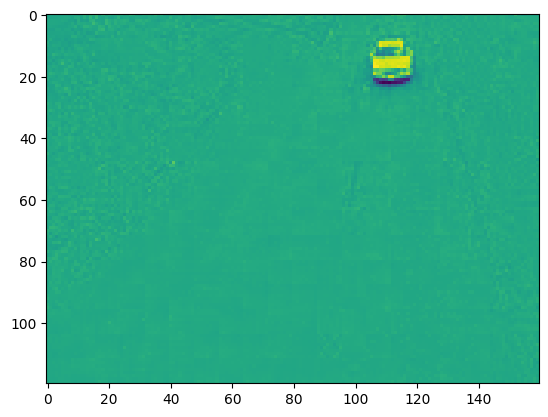

In [69]:
# Let's see it with the 10th image
image = frames[10, : , : , :]

foreground_3 = image - background_3

f_gray_3 = rgb2gray(foreground_3)

plt.imshow(f_gray_3)

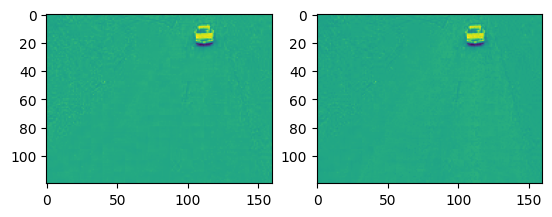

In [71]:
plt.subplot(1,2,1)
plt.imshow(f_gray_3)

plt.subplot(1,2, 2)
plt.imshow(f_gray)

# **Conclusion**

`Change the number of components to 3`


**GMM** is used to extract the foreground from the given video.

The number of gaussian curves is 2. It is observed that background subtraction for different frames shows different locations of car for the different frames of the videos

Same process is applied to different frames and foregrounds of all the frames are added to show the movement of foreground object (car)